# Import Library


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

# Import Data


### Distance matrix (50 nodes)

In [2]:
# Distance matrix 50 node
df_distance = pd.read_excel(r'C:\rl-meta-test\src\Source\VRP_50_node.xlsx', sheet_name="Sheet1")
distance = df_distance.iloc[:,1:].to_numpy()
kwargs = {"distance": distance}


# Differential Evolutional Algorithm Parameters

In [3]:
dimensions = len(distance) - 1
maxiters = 1000
n_pop = 100
bounds = np.array([[0, 1]] * dimensions)
Mutation_rate = np.array([0.9, 0.5])
Crossover_rate = np.array([0.5, 0.1])

# Differential Evolutional Algorithm


In [4]:
def differential_evolution(
    objective_func,
    bounds,
    population_size=n_pop,
    max_generations=maxiters,
    Mutation_rate=Mutation_rate,
    Crossover_rate=Crossover_rate,
    **kwargs,
):
    # Initialize population
    population = np.random.uniform(
        bounds[:, 0], bounds[:, 1], (population_size, len(bounds))
    )
    global_solution = np.array([])
    Upperbound_Mutation = Mutation_rate[1]
    Lowerbound_Mutation = Mutation_rate[0]
    Upperbound_Crossover_rate = Crossover_rate[1]
    Lowerbound_Crossover_rate = Crossover_rate[0]
    F = Mutation_rate[0]
    CR = Crossover_rate[0]
    for generation in range(max_generations):
        # print(f'Iteration {generation}')
        current_cost = np.array([])
        F += (Upperbound_Mutation - Lowerbound_Mutation) / max_generations
        CR += (Upperbound_Crossover_rate - Lowerbound_Crossover_rate) / max_generations
        for i in range(population_size):
            # Mutation
            indices = [idx for idx in range(population_size) if idx != i]
            a, b, c = population[np.random.choice(indices, 3, replace=False)]
            mutant = population[i] + F * (b - c)

            # Crossover
            crossover_prob = np.random.rand(len(bounds))
            trial = np.where(crossover_prob < CR, mutant, population[i])

            # Selection
            fitness_trial = objective_func(trial, **kwargs)
            fitness_current = objective_func(population[i], **kwargs)

            if fitness_trial < fitness_current:
                population[i] = trial
                current_cost = np.insert(current_cost, len(current_cost), fitness_trial)
            else:
                current_cost = np.insert(
                    current_cost, len(current_cost), fitness_current
                )
            #print(f"population {i}")
            #print(f"current_cost{current_cost}")
            #print("---------" * 30)
        best_index_plot = current_cost[np.argmin(current_cost)]
        global_solution = np.insert(
            global_solution, len(global_solution), best_index_plot
        )

    # Find the best solution
    best_index = np.argmin(
        [objective_func(individual, **kwargs) for individual in population]
    )
    best_solution = population[best_index]

    return best_solution, global_solution

# Objective Function Evolution


In [5]:
def objective_func(x, **kwargs):
    """Decoding of each particles for obtaining routing solutions by argsort()"""
    seq = x.argsort() + 1
    """Calculate objective function for obtaining objective value of each particle"""
    j = f_per_particle(seq, **kwargs)
    return np.array(j)


def f_per_particle(m, **kwargs):
    X = m  # Sequence
    obj_val = preserving_strategy(X, **kwargs)  # Call Preserving strategy.
    return obj_val


def preserving_strategy(X, **kwargs):
    # distance matrix
    distance = kwargs["distance"]
    # total distance starts from zero km.
    total_distance = 0
    # Vehicle travel from depot to customer i
    total_distance += distance[0][X[0]]
    # Total distance of routing solution
    for i in range(len(X) - 1):
        total_distance += distance[X[i]][X[i + 1]]
    # Vehicle returns to depot
    total_distance += distance[X[-1]][0]
    # Return total distance (km.) that vehicle traveled
    return total_distance

# Finding Solution


In [6]:
start_algorithm = time.time()
best_solution, global_solution_plot = differential_evolution(
    objective_func,
    bounds=bounds,
    population_size=n_pop,
    max_generations=maxiters,
    Mutation_rate=Mutation_rate,
    Crossover_rate=Crossover_rate,
    **kwargs,
)
End_algorithm = time.time()
run_algorithm = End_algorithm - start_algorithm

# Solution


In [7]:
best_solution

array([-3.52174372e+02, -1.87662511e+01,  8.81746416e+01,  9.41618783e+01,
       -4.73307759e+03, -4.68675536e+03, -8.22073844e+03, -2.74179457e+03,
       -1.73191147e+03, -6.51495355e+02, -1.15719270e+03, -1.20507824e+03,
       -4.29085243e+02, -1.07388221e+03, -1.58288475e+03, -4.65792108e+01,
       -5.18582071e+01, -2.08294216e+02, -1.13137668e+02, -1.69774849e+02,
       -8.04580972e+01, -3.47317077e+01,  2.09770206e+02,  1.94990331e+02,
        2.89131194e+02,  1.45326250e+02,  2.40534461e+00,  1.07242273e+01,
        3.12812459e+02, -8.87056499e+00,  1.76273526e+01,  3.00690219e+02,
        2.18996792e+01,  2.90354673e+01,  1.25065296e+02,  3.66770133e+02,
        1.21211363e+02,  4.94003682e+02,  2.20344690e+02,  4.40815970e+02,
       -1.07497204e+01, -2.77961184e+01,  5.61133299e+01,  4.07364902e+01,
       -1.32691426e+01,  8.22484569e+01,  4.40990244e+02,  4.45785101e+02,
        1.02207560e+02])

In [8]:
routing = best_solution.argsort() + 1
routing = np.insert(routing, len(routing), 0)
routing = np.insert(routing, 0, 0)
print(f" Routing: {routing}")

 Routing: [ 0  7  5  6  8  9 15 12 11 14 10 13  1 18 20 19 21 17 16 22 42  2 45 41
 30 27 28 31 33 34 44 43 46  3  4 49 37 35 26 24 23 39 25 32 29 36 40 47
 48 38  0]


In [19]:
print(f" Total distance {preserving_strategy(routing[1:-1], **kwargs)} KM.")

 Total distance 1642.349 KM.


In [21]:
routing[1:-1]

array([ 7,  5,  6,  8,  9, 15, 12, 11, 14, 10, 13,  1, 18, 20, 19, 21, 17,
       16, 22, 42,  2, 45, 41, 30, 27, 28, 31, 33, 34, 44, 43, 46,  3,  4,
       49, 37, 35, 26, 24, 23, 39, 25, 32, 29, 36, 40, 47, 48, 38])

In [17]:
global_solution_plot[-1]

np.float64(1642.349)

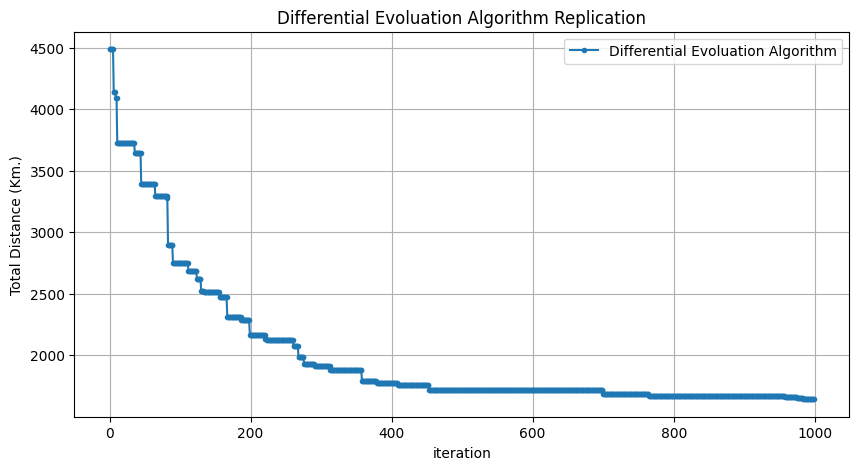

In [11]:
Replication = [i for i in range(len(global_solution_plot))]
y1 = global_solution_plot.tolist()
fig, ax = plt.subplots(1, figsize=(10, 5))
ax.plot(Replication, y1, marker=".", label="Differential Evoluation Algorithm")
ax.set(
    xlabel="iteration",
    ylabel="Total Distance (Km.)",
    title="Differential Evoluation Algorithm Replication",
)
ax.grid()
ax.legend()
plt.show()